In [1]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import xgboost as xgb  
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,  cross_val_score, cross_val_predict, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve, auc, make_scorer
from scipy import interp
from itertools import cycle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier



%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Bhavesh\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option('display.max_rows',20000)
pd.set_option('display.max_columns',20000)


In [4]:
df = pd.read_csv("phase_data_sample.csv")
x  = df.drop(['label'], axis=1)
y = df['label']

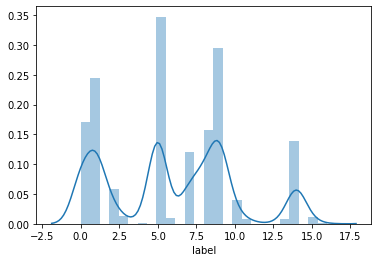

In [4]:
#sns.countplot(df['label'])
#sns.distplot( df['label'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,
     random_state=22)

In [115]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
#pca = PCA(n_components=10)
#lr = LogisticRegression(solver='liblinear', multi_class='ovr')
#Suvm = SVC()
#Suvm.fit(X_train,y_train)
#y_score = Suvm.predict(X_test)
#accuracy_score(y_test,y_score)

classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=22))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [94]:
#y_pred = classifier.predict(X_test)
#accuracy_score(y_test,y_pred)   accuracy = 0.6998

#Suvm = SVC(probability=True)
#Suvm.fit(X_train,y_train).decision_function(X_test)
#y_score = Suvm.predict(X_test)
#accuracy_score(y_test,y_score)

classifier1 = OneVsRestClassifier(SVC(probability=True))
y_score = classifier1.fit(X_train, y_train).decision_function(X_test)
y_pred = classifier1.predict(X_test)
accuracy_score(y_test,y_pred)   

0.7243367935409458

In [95]:
print(classification_report(y_test,y_pred,digits=17))

                   precision    recall  f1-score   support

                0  0.86925795053003529 0.64229765013054829 0.73873873873873885       383
                1  0.94190871369294604 0.84543761638733705 0.89106967615309129       537
                2  0.86131386861313863 0.96721311475409832 0.91119691119691104       122
                3  1.00000000000000000 0.03125000000000000 0.06060606060606061        32
                4  0.50000000000000000 0.50000000000000000 0.50000000000000000         2
                5  0.89244186046511631 0.82526881720430112 0.85754189944134085       744
                6  0.00000000000000000 0.00000000000000000 0.00000000000000000        22
                7  0.89823008849557517 0.80237154150197632 0.84759916492693110       253
                8  0.84081632653061222 0.66237942122186499 0.74100719424460448       311
                9  0.87378640776699024 0.71090047393364930 0.78397212543554007       633
               10  1.00000000000000000 0.025000000

In [13]:
#y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
#n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
classifier.predict_proba(X_test)

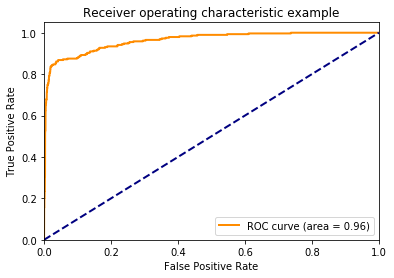

In [84]:
plt.figure()
lw = 2
plt.plot(fpr[14], tpr[14], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[14])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [88]:
 mean_tpr

array([nan, nan, nan, ..., nan, nan, nan])

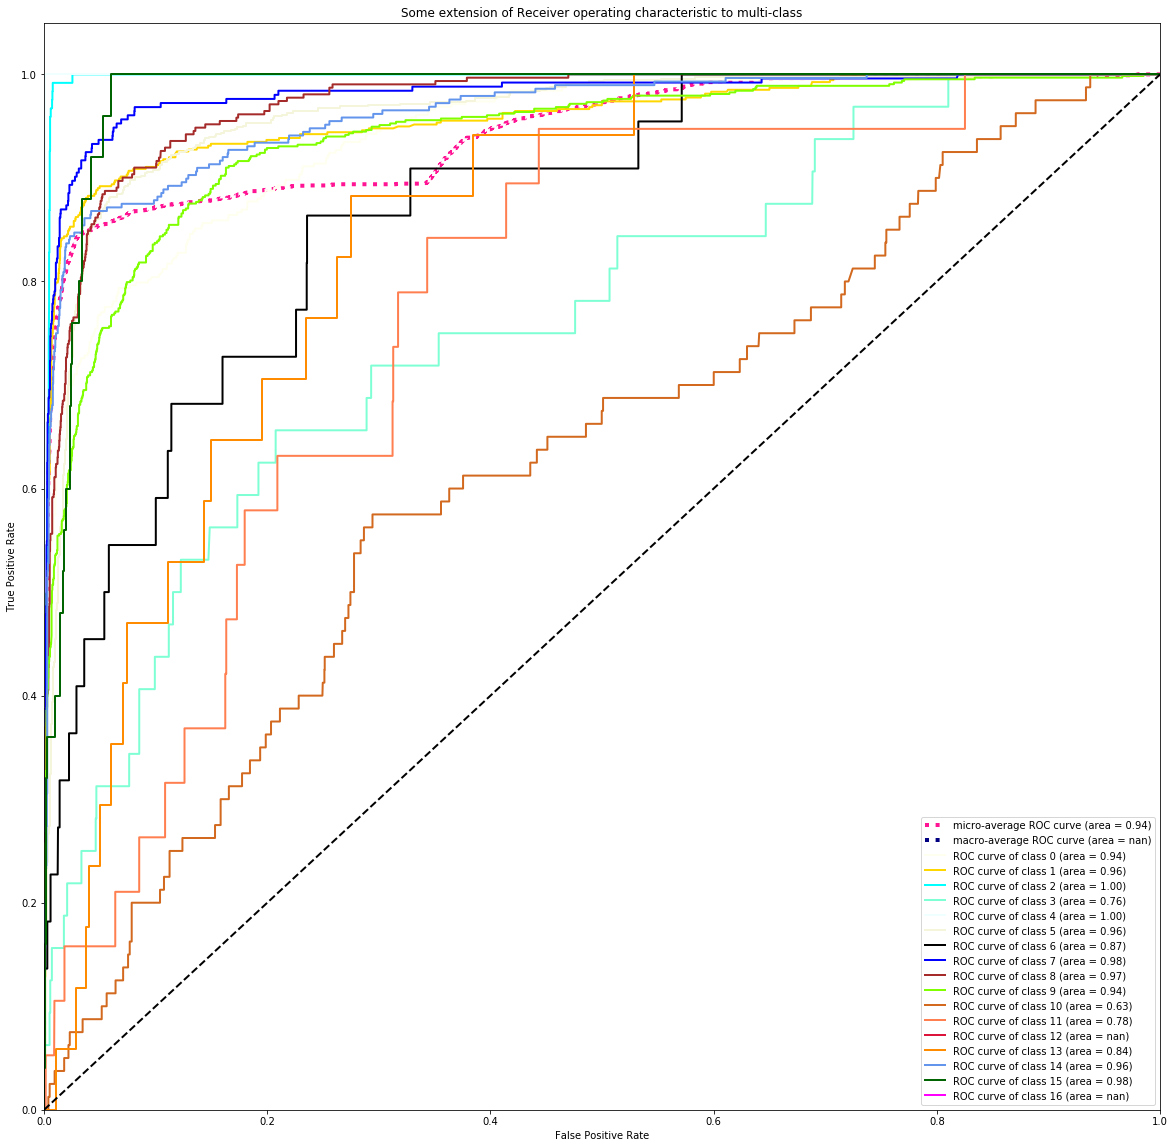

In [50]:

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20, 20))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['ivory','gold','aqua', 'aquamarine','azure','beige','black','blue','brown','chartreuse','chocolate','coral','crimson','darkorange', 'cornflowerblue','darkgreen','fuchsia'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()


In [113]:
#y_prob = classifier1.predict_proba(X_test)

#myscore = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
#cross_validate(classifier1, X_test, y_test, cv=10, scoring = myscore)

#macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class='ovo',average="macro")
#weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="weighted")
#macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class='ovr',average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",average="weighted")

#print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
#print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


TypeError: roc_auc_score() got an unexpected keyword argument 'multi_class'

In [47]:
def plot_learning_curve(estimator1,X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

ValueError: error_score must be the string 'raise' or a numeric value. (Hint: if using 'raise', please make sure that it has been spelled correctly.)

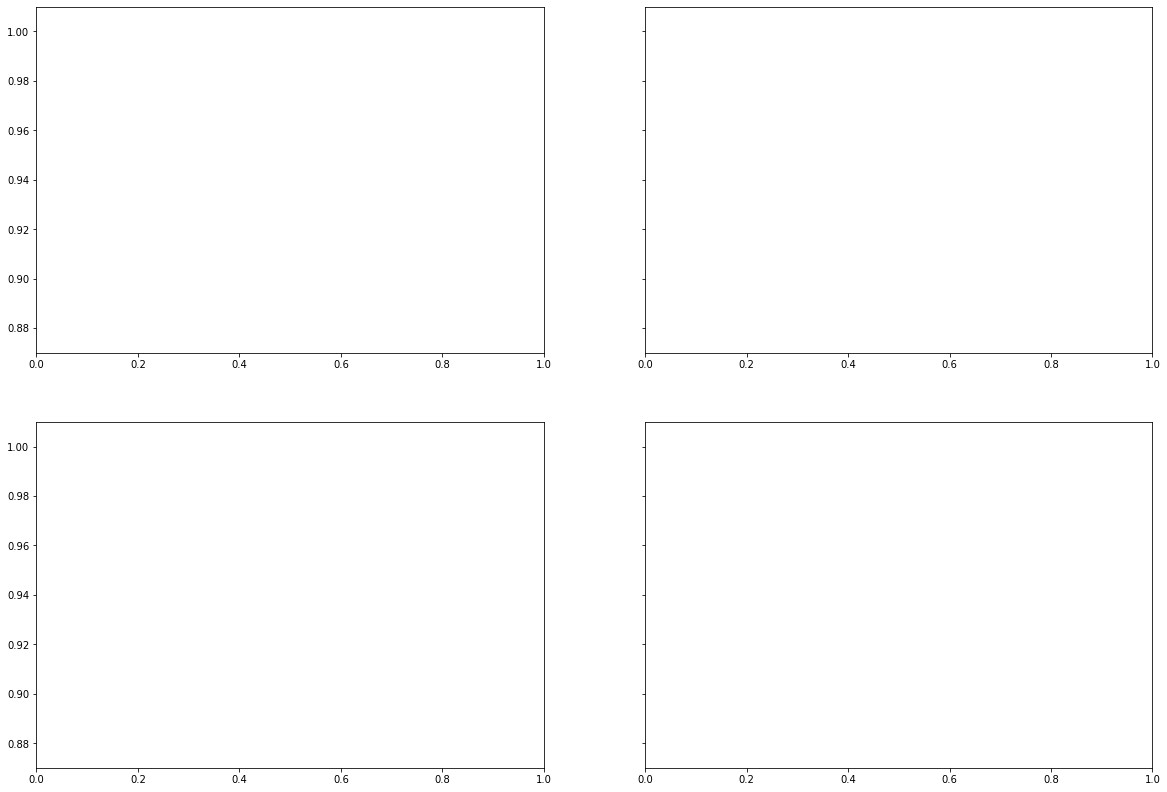

In [48]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(classifier, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [116]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#lr.fit(X_train, y_train)

In [117]:
X_train_pca.shape

(13869, 10)

In [125]:
y_pred = classifier1.predict(X_test)

In [123]:
accuracy_score(y_test,y_pred)
#confusion_matrix(y_test,y_pred)

0.7243367935409458

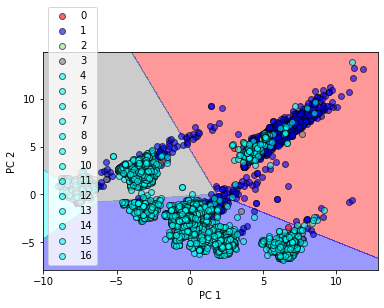

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    #marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

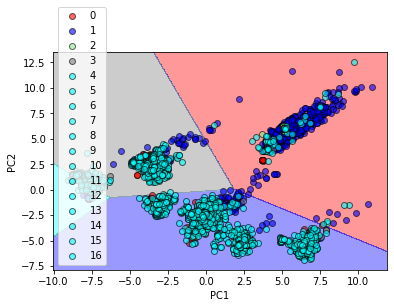

In [19]:

# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()


In [29]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.32123940e-01, 1.04878487e-01, 7.48589322e-02, 5.72953371e-02,
       5.23808019e-02, 4.60247489e-02, 3.59934627e-02, 3.36109073e-02,
       2.84011157e-02, 2.47330879e-02, 2.03194842e-02, 1.86056007e-02,
       1.80235714e-02, 1.70539414e-02, 1.53128919e-02, 1.45750321e-02,
       1.34448190e-02, 1.27893996e-02, 1.18717829e-02, 1.11630877e-02,
       1.09148034e-02, 1.02253767e-02, 9.61949247e-03, 9.45234639e-03,
       8.63948026e-03, 8.51604942e-03, 8.45135327e-03, 8.17750976e-03,
       7.57785813e-03, 7.28839104e-03, 7.03110224e-03, 6.86740783e-03,
       6.63257552e-03, 6.37168927e-03, 6.10236850e-03, 6.00046385e-03,
       5.87600580e-03, 5.76153420e-03, 5.45447971e-03, 5.25574939e-03,
       5.07833986e-03, 4.94155263e-03, 4.86841192e-03, 4.65613326e-03,
       4.51864829e-03, 4.39417260e-03, 4.36693138e-03, 4.28465031e-03,
       4.13347758e-03, 4.02165371e-03, 3.87595606e-03, 3.71601722e-03,
       3.67364679e-03, 3.35485341e-03, 3.30830705e-03, 3.16438645e-03,
      

### CHI SQAURE 

In [93]:
Mn = MinMaxScaler()
X_train_std = Mn.fit_transform(X_train)
X_test_std = sc.transform(X_test)
best_features = SelectKBest(score_func = chi2, k=130 )
fit = best_features.fit(X_train_std,y_train)

In [101]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
113,7022.327938,113
121,4344.907236,121
116,3369.569641,116
120,1714.458997,120
72,1533.221464,72
85,1329.677569,85
96,1271.454520,96
130,1196.656950,130
70,1161.202228,70
97,1104.730773,97


In [108]:
finalfeat = featurescore.nlargest(70,'scores')

In [113]:
finalfeat['specs'].to_numpy()

array(['113', '121', '116', '120', '72', '85', '96', '130', '70', '97',
       '82', '89', '65', '109', '100', '71', '91', '58', '106', '117',
       '80', '112', '57', '103', '59', '55', '107', '115', '93', '126',
       '94', '56', '119', '131', '62', '86', '95', '84', '114', '122',
       '61', '92', '60', '104', '66', '68', '123', '73', '52', '74', '98',
       '67', '78', '133', '132', '64', '125', '79', '118', '105', '69',
       '101', '111', '54', '128', '30', '76', '127', '102', '88'],
      dtype=object)

In [114]:
feat = ['113', '121', '116', '120', '72', '85', '96', '130', '70', '97',
       '82', '89', '65', '109', '100', '71', '91', '58', '106', '117',
       '80', '112', '57', '103', '59', '55', '107', '115', '93', '126',
       '94', '56', '119', '131', '62', '86', '95', '84', '114', '122',
       '61', '92', '60', '104', '66', '68', '123', '73', '52', '74', '98',
       '67', '78', '133', '132', '64', '125', '79', '118', '105', '69',
       '101', '111', '54', '128', '30', '76', '127', '102', '88']

In [116]:
df1 =df[['113', '121', '116', '120', '72', '85', '96', '130', '70', '97',
       '82', '89', '65', '109', '100', '71', '91', '58', '106', '117',
       '80', '112', '57', '103', '59', '55', '107', '115', '93', '126',
       '94', '56', '119', '131', '62', '86', '95', '84', '114', '122',
       '61', '92', '60', '104', '66', '68', '123', '73', '52', '74', '98',
       '67', '78', '133', '132', '64', '125', '79', '118', '105', '69',
       '101', '111', '54', '128', '30', '76', '127', '102', '88']]

In [123]:
#df1 =pd.concat([df1,df['label']],axis=1)
x1  = df1.drop(['label'], axis=1)
y1 = df1['label']
X_train, X_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.2,
     random_state=22)

In [133]:

clf = OneVsRestClassifier(Suvm)
clf.fit(X_train_std,y_train)
y_pred = clf.predict(X_test_std)
accuracy_score(y_test,y_pred)

0.7448096885813149

### Pearson F_regression

In [138]:
#Mn = MinMaxScaler()
#X_train_std = Mn.fit_transform(X_train)
#X_test_std = sc.transform(X_test)
best_features = SelectKBest(score_func = f_regression, k=130 )
fit = best_features.fit(X_train,y_train)

In [139]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
72,4471.935782,72
113,3711.263369,113
97,3296.153460,97
65,3294.267784,65
76,2968.695596,76
85,2850.175722,85
100,2732.768030,100
96,2441.079937,96
71,2002.491354,71
86,1971.825891,86


In [142]:
finalfeat = featurescore.nlargest(70,'scores')

In [143]:
finalfeat['specs'].to_numpy()

array(['72', '113', '97', '65', '76', '85', '100', '96', '71', '86', '68',
       '2', '37', '94', '98', '78', '58', '30', '23', '57', '79', '70',
       '55', '59', '63', '84', '126', '56', '33', '41', '89', '67', '3',
       '121', '116', '112', '105', '26', '40', '91', '108', '66', '82',
       '5', '73', '93', '18', '11', '32', '29', '51', '111', '16', '39',
       '81', '99', '52', '74', '14', '48', '61', '45', '104', '107',
       '120', '25', '60', '31', '36', '75'], dtype=object)

In [163]:
df1 =df[['72', '113', '97', '65', '76', '85', '100', '96', '71', '86', '68',
       '2', '37', '94', '98', '78', '58', '30', '23', '57', '79', '70',
       '55', '59', '63', '84', '126', '56', '33', '41', '89', '67', '3',
       '121', '116', '112', '105', '26', '40', '91', '108', '66', '82',
       '5', '73', '93', '18', '11', '32', '29', '51', '111', '16', '39',
       '81', '99', '52', '74', '14', '48', '61', '45', '104', '107',
       '120', '25', '60', '31', '36', '75','label']]

In [164]:
x1  = df1.drop(['label'], axis=1)
y1 = df1['label']
X_train, X_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.2,
     random_state=22)

In [165]:
Suvm = SVC()
Suvm.fit(X_train,y_train)
y_pred = Suvm.predict(X_test)
accuracy_score(y_test,y_pred)

0.7626874279123415

In [152]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [153]:
Suvm = SVC()
Suvm.fit(X_train_std,y_train)
y_pred = Suvm.predict(X_test_std)
accuracy_score(y_test,y_pred)

0.7401960784313726

### ANNOVA f_classif

In [243]:
best_features = SelectKBest(score_func = f_classif, k=130 )
fit = best_features.fit(X_train,y_train)

In [251]:
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
113,1371.229159,113
72,939.515671,72
96,789.305416,96
70,767.753704,70
85,761.909464,85
71,643.707042,71
65,565.592195,65
91,526.654872,91
76,487.381271,76
97,484.914991,97


In [268]:
finalfeat =featurescore.nlargest(70,'scores')

In [269]:
finalfeat['specs'].to_numpy()

array(['113', '72', '96', '70', '85', '71', '65', '91', '76', '97', '109',
       '100', '121', '58', '57', '55', '111', '95', '116', '126', '103',
       '80', '86', '89', '67', '94', '59', '105', '82', '8', '73', '26',
       '56', '106', '125', '112', '107', '127', '61', '38', '62', '68',
       '7', '19', '33', '79', '2', '60', '98', '130', '43', '52', '66',
       '93', '31', '132', '9', '41', '104', '78', '102', '30', '92', '46',
       '40', '47', '83', '81', '84', '37'], dtype=object)

In [270]:
df1 =df[['113', '72', '96', '70', '85', '71', '65', '91', '76', '97', '109',
       '100', '121', '58', '57', '55', '111', '95', '116', '126', '103',
       '80', '86', '89', '67', '94', '59', '105', '82', '8', '73', '26',
       '56', '106', '125', '112', '107', '127', '61', '38', '62', '68',
       '7', '19', '33', '79', '2', '60', '98', '130', '43', '52', '66',
       '93', '31', '132', '9', '41', '104', '78', '102', '30', '92', '46',
       '40', '47', '83', '81', '84', '37','label']]

In [271]:
x1  = df1.drop(['label'], axis=1)
y1 = df1['label']
X_train, X_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.2,
     random_state=22)

In [273]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}  

In [ ]:
grid_svc = GridSearchCV(SVC(), param_grid)
grid_svc.fit(X_train, y_train)

In [272]:
Suvm = SVC()
Suvm.fit(X_train,y_train)
y_pred = Suvm.predict(X_test)
accuracy_score(y_test,y_pred)

0.7811418685121108

In [170]:
clf = OneVsRestClassifier(Suvm)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7857554786620531

### Mutual information 

In [175]:
best_features = SelectKBest(score_func = mutual_info_classif, k=130 )
fit = best_features.fit(X_train,y_train)
dfscore= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescore = pd.concat([dfscore,dfcolumns],axis=1)
featurescore.columns = ['scores','specs']
featurescore.sort_values(by=['scores'], axis=0, ascending=False)

,scores,specs
30,0.965070,30
43,0.951945,43
28,0.949999,28
6,0.946109,6
19,0.943858,19
33,0.943438,33
44,0.942989,44
41,0.941175,41
21,0.941069,21
25,0.940937,25


In [189]:
finalfeat = featurescore.nlargest(60,'scores')

In [190]:
finalfeat['specs'].to_numpy()

array(['30', '43', '28', '6', '19', '33', '44', '41', '21', '25', '46',
       '9', '45', '8', '47', '0', '24', '16', '4', '18', '10', '11', '20',
       '48', '12', '49', '1', '38', '32', '2', '5', '34', '27', '3', '15',
       '22', '35', '26', '17', '37', '36', '42', '13', '29', '31', '23',
       '40', '7', '14', '39', '79', '98', '89', '99', '87', '92', '104',
       '76', '81', '96'], dtype=object)

In [191]:
df1 =df[['30', '43', '28', '6', '19', '33', '44', '41', '21', '25', '46',
       '9', '45', '8', '47', '0', '24', '16', '4', '18', '10', '11', '20',
       '48', '12', '49', '1', '38', '32', '2', '5', '34', '27', '3', '15',
       '22', '35', '26', '17', '37', '36', '42', '13', '29', '31', '23',
       '40', '7', '14', '39', '79', '98', '89', '99', '87', '92', '104',
       '76', '81', '96','label']]

In [192]:
x1  = df1.drop(['label'], axis=1)
y1 = df1['label']
X_train, X_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.2,
     random_state=22)

In [193]:
Suvm = SVC()
Suvm.fit(X_train,y_train)
y_pred = Suvm.predict(X_test)
accuracy_score(y_test,y_pred)

0.7277970011534025

In [194]:
clf = OneVsRestClassifier(Suvm)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7226066897347174

In [7]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}  

In [ ]:
grid_svc = GridSearchCV(SVC(), param_grid,cv=5,)
grid_svc.fit(X_train, y_train)

In [ ]:
grid_svc.best_params